In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("spam.csv", encoding='ISO-8859-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
dfcopy=df.copy()

In [6]:
dfcopy.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
dfcopy.shape

(5572, 5)

# Data Cleaning

In [8]:
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
#drop unnamed columns
dfcopy=dfcopy.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"])

In [10]:
dfcopy.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
#renaming the column names
dfcopy=dfcopy.rename(columns={"v1":"Target","v2":"Text"})

In [12]:
dfcopy.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
#Check Null Values:
dfcopy.isnull().sum()

Target    0
Text      0
dtype: int64

In [15]:
#Check Duplicate Values
dfcopy.duplicated().sum()

403

In [18]:
#drop duplicates
dfcopy=dfcopy.drop_duplicates()

In [19]:
dfcopy.duplicated().sum()

0

In [20]:
dfcopy.shape

(5169, 2)

# Preprocessing

In [23]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le=LabelEncoder()
dfcopy["Target"]=le.fit_transform(dfcopy["Target"])

In [27]:
dfcopy.head()      #ham:0 , spam:1

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# EDA (Exploratory Data Analysis)

In [28]:
dfcopy.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
dfcopy["Target"].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

# Pie Chart

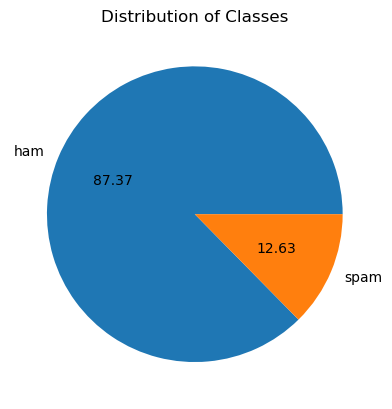

In [38]:
plt.pie(dfcopy["Target"].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.title("Distribution of Classes")
plt.show()

# Count Plot

<Axes: xlabel='Target', ylabel='count'>

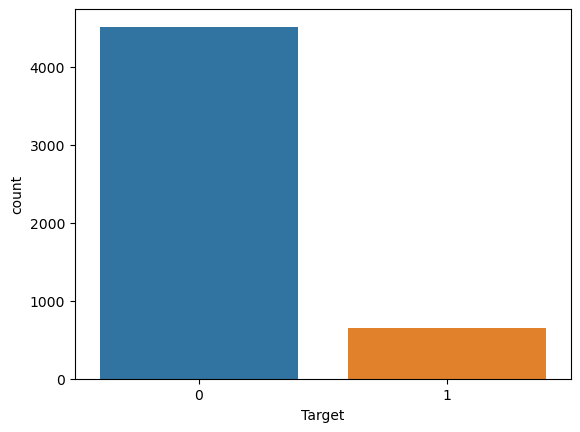

In [36]:
sns.countplot(data=dfcopy,x='Target')

In [39]:
!pip install nltk

In [41]:
import nltk

In [42]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Aqsa
[nltk_data]     Kanwal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [43]:
dfcopy["num_characters"]=dfcopy['Text'].apply(len)

In [44]:
dfcopy.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [46]:
dfcopy["num_words"]=dfcopy["Text"].apply(lambda x: len(nltk.word_tokenize(x)))

In [47]:
dfcopy.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [49]:
dfcopy["num_sentence"]=dfcopy["Text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [50]:
dfcopy.head()

,Target,Text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [52]:
dfcopy[['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [53]:
#ham 
dfcopy[dfcopy["Target"]==0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [54]:
#spam
dfcopy[dfcopy["Target"]==1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


# Histogram

<Axes: xlabel='num_characters', ylabel='Count'>

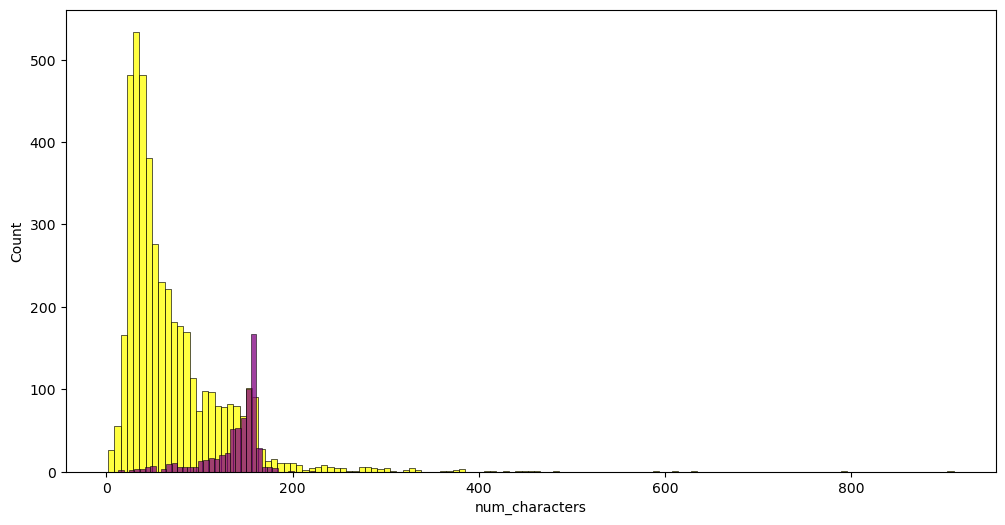

In [56]:
plt.figure(figsize=(12,6))
sns.histplot(dfcopy[dfcopy["Target"]==0]['num_characters'],color="yellow")
sns.histplot(dfcopy[dfcopy["Target"]==1]['num_characters'],color="purple")

<Axes: xlabel='num_words', ylabel='Count'>

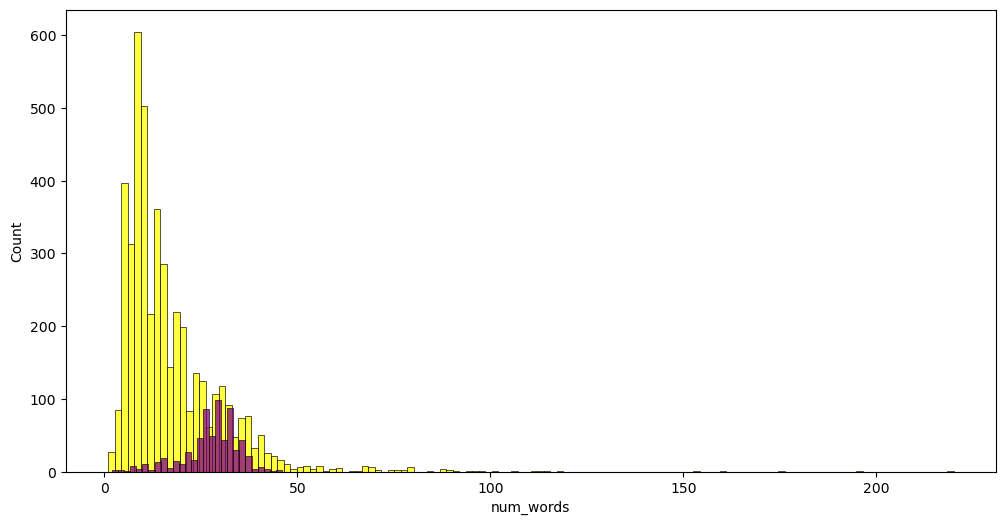

In [58]:
plt.figure(figsize=(12,6))
sns.histplot(dfcopy[dfcopy['Target']==0]['num_words'],color="yellow")
sns.histplot(dfcopy[dfcopy['Target']==1]['num_words'],color='purple')

<Axes: xlabel='num_sentence', ylabel='Count'>

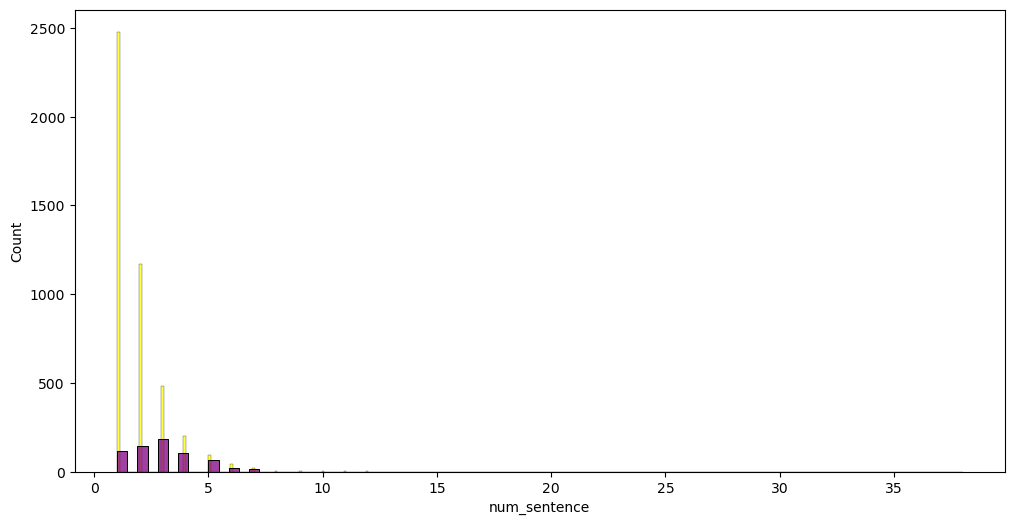

In [60]:
plt.figure(figsize=(12,6))
sns.histplot(dfcopy[dfcopy["Target"]==0]['num_sentence'],color="yellow")
sns.histplot(dfcopy[dfcopy["Target"]==1]['num_sentence'],color="purple")

# Data Preprocessing

In [73]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [65]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Aqsa
[nltk_data]     Kanwal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [66]:
#from nltk.corpus import stopwords
#stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [67]:
#import string
#string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [69]:
# from nltk.stem.porter import PorterStemmer
# ps=PorterStemmer()
# ps.stem("loving")

'love'

In [74]:
dfcopy["Transformed_text"]=dfcopy["Text"].apply(transform_text)

In [75]:
dfcopy.head()

,Target,Text,num_characters,num_words,num_sentence,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [78]:
!pip install wordcloud

In [79]:
from wordcloud import WordCloud

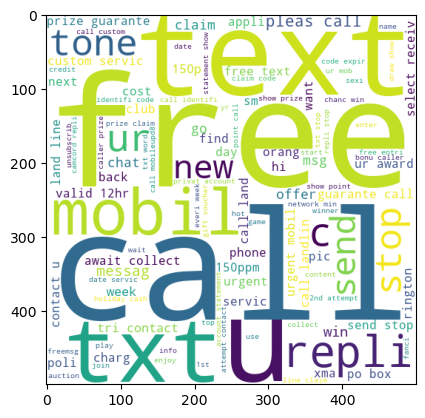

In [82]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")
spam_wc=wc.generate(dfcopy[dfcopy["Target"]==1]["Transformed_text"].str.cat(sep=" "))
plt.imshow(spam_wc)

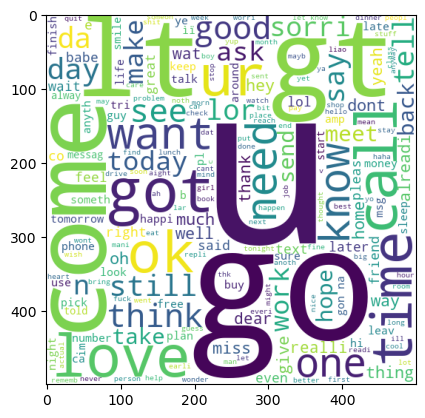

In [83]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")
ham_wc=wc.generate(dfcopy[dfcopy["Target"]==0]["Transformed_text"].str.cat(sep=" "))
plt.imshow(ham_wc)

In [86]:
spam_corpus=[]
for msg in dfcopy[dfcopy['Target']==1]['Transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [88]:
len(spam_corpus)

9939

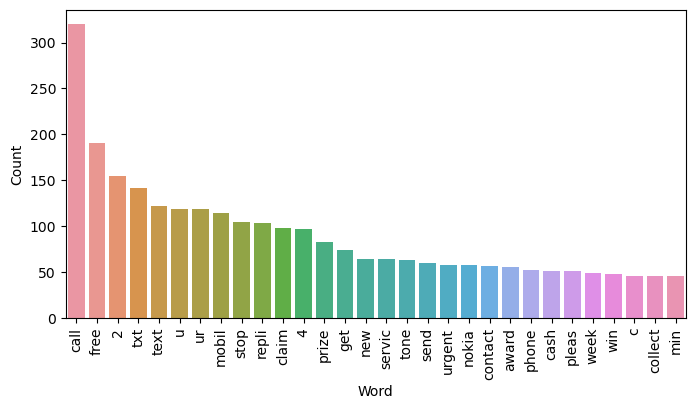

In [99]:
from collections import Counter
word_counts=Counter(spam_corpus).most_common(30)
word_counts_df=pd.DataFrame(word_counts, columns=['Word', 'Count'])
plt.figure(figsize=(8,4))
sns.barplot(data=word_counts_df, x='Word', y='Count')
plt.xticks(rotation='vertical')
plt.show()

In [92]:
ham_corpus=[]
for msg in dfcopy[dfcopy['Target']==0]['Transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [93]:
len(ham_corpus)

35404

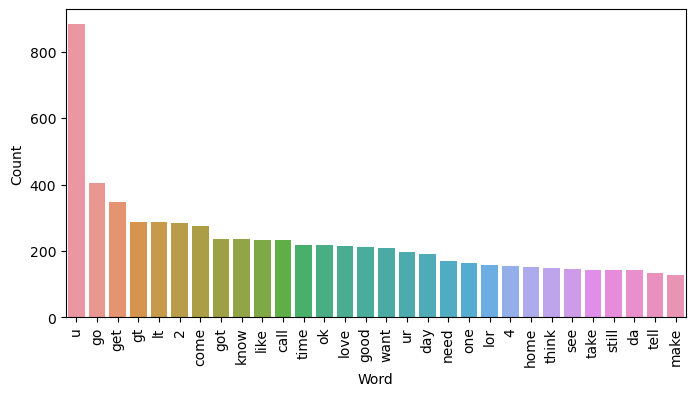

In [101]:
from collections import Counter
word_counts=Counter(ham_corpus).most_common(30)
word_counts_df=pd.DataFrame(word_counts, columns=['Word', 'Count'])
plt.figure(figsize=(8,4))
sns.barplot(data=word_counts_df, x='Word', y='Count')
plt.xticks(rotation='vertical')
plt.show()

# Text Vectorization

# CountVectorizer

In [127]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [128]:
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [129]:
X=tfidf.fit_transform(dfcopy["Transformed_text"]).toarray()

In [130]:
X.shape

(5169, 6708)

In [131]:
y=dfcopy["Target"]

In [132]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Target, Length: 5169, dtype: int32

# Train Test Split

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

# Model Building

In [135]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [136]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

# GaussianNB()

In [137]:
gnb.fit(X_train,y_train)

GaussianNB()

In [138]:
y_pred1=gnb.predict(X_test)
print("Accuracy score: {}".format(accuracy_score(y_test,y_pred1)))
print(confusion_matrix(y_test,y_pred1))
print("precision score: {}".format(precision_score(y_test,y_pred1)))

Accuracy score: 0.8762088974854932
[[793 103]
 [ 25 113]]
precision score: 0.5231481481481481


# MultinomialNB()

In [139]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [140]:
y_pred2=mnb.predict(X_test)
print("Accuracy score: {}".format(accuracy_score(y_test,y_pred2)))
print(confusion_matrix(y_test,y_pred2))
print("precision score: {}".format(precision_score(y_test,y_pred2)))

Accuracy score: 0.9593810444874274
[[896   0]
 [ 42  96]]
precision score: 1.0


# BernoulliNB()

In [141]:
bnb.fit(X_train,y_train)

BernoulliNB()

In [142]:
y_pred3=bnb.predict(X_test)
print("Accuracy score: {}".format(accuracy_score(y_test,y_pred3)))
print(confusion_matrix(y_test,y_pred3))
print("precision score: {}".format(precision_score(y_test,y_pred3)))

Accuracy score: 0.9700193423597679
[[893   3]
 [ 28 110]]
precision score: 0.9734513274336283
